## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [13]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [14]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [15]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [16]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [17]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0811 12:22:03.052664 139620787226432 deprecation.py:323] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 12:22:03.081150 139620787226432 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 43us/step - loss: 1.9590 - acc: 0.2934 - val_loss: 1.8056 - val_acc: 0.3553
Epoch 2/500
50000/50000 [==============================] - 1s 25us/step - loss: 1.7268 - acc: 0.3840 - val_loss: 1.6732 - val_acc: 0.3961
Epoch 3/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.6325 - acc: 0.4167 - val_loss: 1.5849 - val_acc: 0.4324
Epoch 4/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.5624 - acc: 0.4444 - val_loss: 1.5688 - val_acc: 0.4434
Epoch 5/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.5142 - acc: 0.4603 - val_loss: 1.5303 - val_acc: 0.4518
Epoch 6/500
50000/50000 [==============================] - 1s 25us/step - loss: 1.4729 - acc: 0.4749 - val_loss: 1.5009 - val_acc: 0.4623
Epoch 7/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.4375 - acc: 0.4872 - val_loss: 1.4910 - 

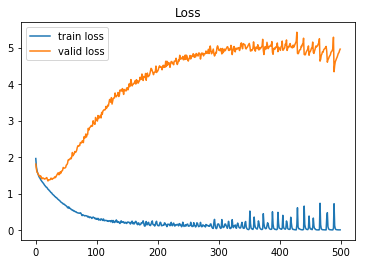

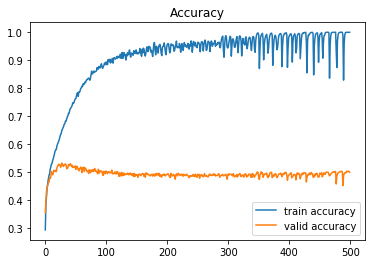

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [18]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 1s 25us/step - loss: 2.2721 - acc: 0.1451 - val_loss: 2.2319 - val_acc: 0.1856
Epoch 2/500
50000/50000 [==============================] - 1s 20us/step - loss: 2.1965 - acc: 0.2119 - val_loss: 2.1679 - val_acc: 0.2303
Epoch 3/500
50000/50000 [==============================] - 1s 21us/step - loss: 2.1391 - acc: 0.2495 - val_loss: 2.1194 - val_acc: 0.2566
Epoch 4/500
50000/50000 [==============================] - 1s 21us/step - loss: 2.0957 - acc: 0.2692 - val_loss: 2.0807 - val_acc: 0.2780
Epoch 5/500
50000/50000 [==============================] - 1s 21us/step - loss: 2.0603 - acc: 0.2847 - val_loss: 2.0487 - val_acc: 0.2898
Epoch 6/500
50000/50000 [==============================] - 1s 20us/step - loss: 2.0302 - acc: 0.2960 - val_loss: 2.0211 - val_acc: 0.3018
Epoch 7/500
50000/50000 [==============================] - 1s 20us/step - loss: 2.0040 - acc: 0.3055 - val_loss: 1.9962 - 

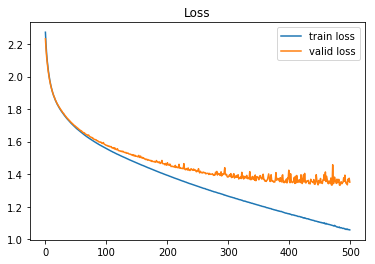

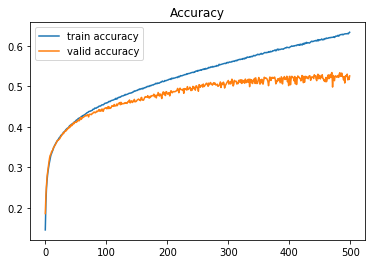

In [19]:
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()